In [1]:
import walk
from experiment import MultipleExperiment
from fitter import Fitter, get_common_distributions, get_distributions
import tests

In [2]:
def wf(weight):
    return weight ** (1/2)

test = MultipleExperiment(walk.SelfInteractingRandomWalk, n_trials=500, length=10000, chunk_size=100, weight_function=wf)
test.run()

Fitting 1 distributions: 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,20.642354,9.383492,-1568.773136,0.119343,0.045526,0.243733


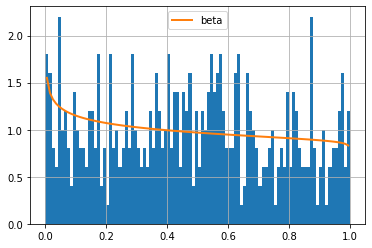

In [3]:
f = Fitter(test.stats['ta0'], distributions=['beta'])
f.fit()
f.summary(method='ks_pvalue')

In [4]:
f.fitted_param['beta']

(0.9006381058446569,
 1.0183122259401962,
 -2.847328959536787e-29,
 0.9999962855933872)

In [5]:
tests.arcsine_test(test.stats['ta0'], 0.5, 0.5)

KstestResult(statistic=0.1300790566528054, pvalue=7.763954844132288e-08)

In [6]:
tests.arcsine_test(test.stats['ta0'], 1, 1)

KstestResult(statistic=0.06329999999999991, pvalue=0.034812429591876026)

In [7]:
def wf(weight):
    return weight ** -1

test2 = MultipleExperiment(walk.SelfInteractingRandomWalk, n_trials=500, length=10000, chunk_size=100, weight_function=wf)
test2.run()

Fitting 2 distributions: 100%|██████████| 2/2 [00:00<00:00, 27.40it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,318.188719,55.212990,-201.123285,inf,0.215214,8.308128e-21
arcsine,283.925518,44.619044,-270.518862,inf,0.134727,2.239944e-08


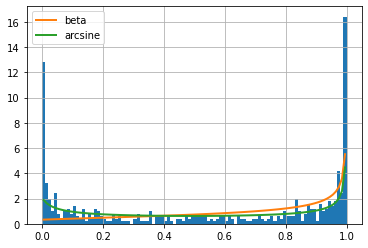

In [12]:
f2 = Fitter(test2.stats['ta0'], distributions=['beta', 'arcsine'])
f2.fit()
f2.summary(method='ks_pvalue')

In [9]:
f2.fitted_param['beta']

(1.401204663174946,
 0.6098524473175528,
 -0.17688429981797144,
 1.1768842998179716)

In [10]:
tests.arcsine_test(test2.stats['ta0'], 0.5, 0.5)

KstestResult(statistic=0.1313590079965682, pvalue=5.537659453786002e-08)

In [13]:
tests.arcsine_test(test2.stats['ta0'], 0.25, 0.25)

KstestResult(statistic=0.0583816079925753, pvalue=0.06358879087616798)